In [1]:
import numpy as np
import os
import sys
sys.path.append("../datasets/")
from MultiSegmentationDataset import MultiSegmentationDataset
from BinarySegmentationDataset import BinarySegmentationDataset
import matplotlib.pyplot as plt
import cv2
import torch
from torch.utils.data import DataLoader

## Testing Binary Segmentation Dataset

The binary segmentation dataset used to test this class can be found at : https://www.kaggle.com/datasets/arnavjain1/glaucoma-datasets. In particular the G1020 dataset is used for this demonstration.

In [2]:
images_dir = "../data/G1020/Images_Square/"
masks_dir = "../data/G1020/Masks_Square/"

In [3]:
bin_dataset = BinarySegmentationDataset(images_dir, masks_dir)

In [4]:
bin_dataset.__len__()

1020

In [5]:
x, y = bin_dataset[0]

In [6]:
print(f"image : {x.shape}")
print(f"mask : {y.shape}")

image : torch.Size([3, 512, 512])
mask : torch.Size([512, 512])


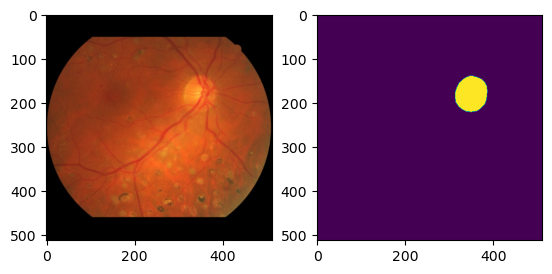

In [7]:
#convert image to numpy array 
x = x.numpy().transpose(1,2,0).astype(np.uint8)

#plot image and mask side-by-side
fig, ax = plt.subplots(1,2)
ax[0].imshow(x)
ax[1].imshow(y)

### Test with data loader

In [9]:
dl = DataLoader(bin_dataset, batch_size=4, shuffle=True)

In [10]:
x, y = next(iter(dl))
print(f"batch image : {x.shape}")
print(f"batch mask : {y.shape}")

batch image : torch.Size([4, 3, 512, 512])
batch mask : torch.Size([4, 512, 512])


## Multi-class Segmentation Dataset

### Mode 0: All classes represented as unique numbers within one mask image.

This mode is for segmentation masks that encode all the classes as individual numbers between 0-255.

To test this model the following dataset has been used : https://www.kaggle.com/datasets/rajkumarl/people-clothing-segmentation. This dataset contains 56 different classes for articles of clothing, which are encoded as numbers between 0-255 in grayscale images.

In [2]:
images_dir = "../data/clothes/png_images/IMAGES/"
masks_dir = "../data/clothes/png_masks/MASKS/"

In [3]:
multi_dataset = MultiSegmentationDataset(images_dir, mode=0, mask_dir=masks_dir, classes=56)

In [4]:
multi_dataset.__len__()

1000

In [12]:
x, y = multi_dataset[10]

In [13]:
print(f"image : {x.shape}")
print(f"mask : {y.shape}")

image : torch.Size([3, 825, 550])
mask : torch.Size([56, 825, 550])


(-0.5, 549.5, 824.5, -0.5)

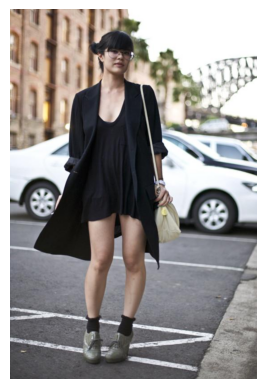

In [16]:
#set up a 3 row subplot, 1 row for just one image, 2nd and 3rd row split into 4 columns for 8 masks
plt.imshow(x.numpy().transpose(1,2,0).astype(np.uint8))
plt.axis('off')

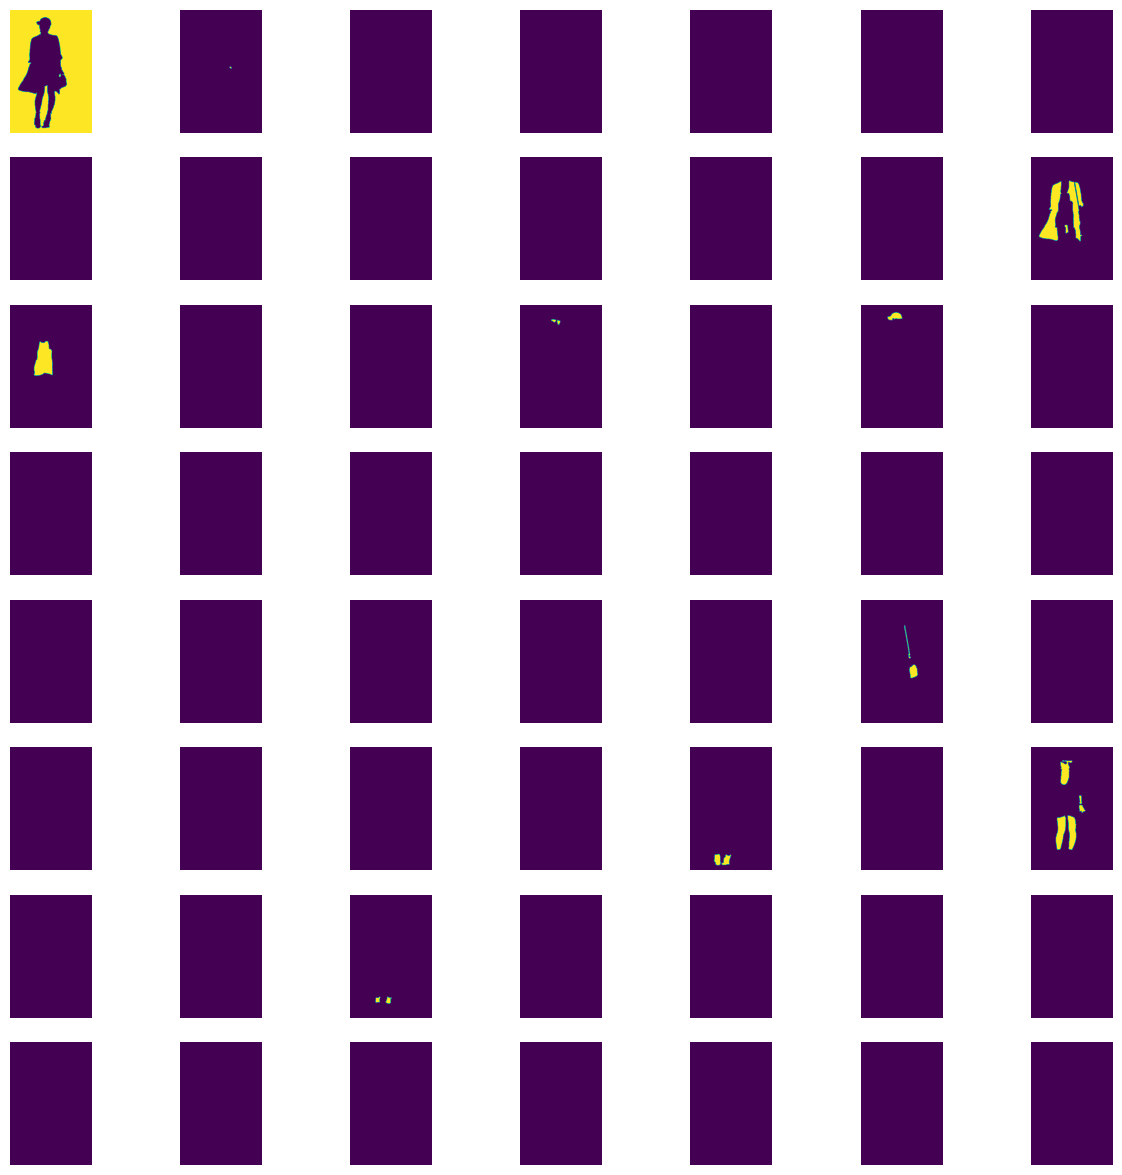

In [17]:
#plot all 56 class-wise masks in appropriate grid
fig, ax = plt.subplots(8,7, figsize=(15,15))
for i in range(8):
    for j in range(7):
        ax[i,j].imshow(y[i*7+j].numpy())
        ax[i,j].axis('off')

### Mode 1: Separate directory for each class.

This mode is for segmentation masks that are distributed in separate directories for each class, and each directory has masks of that class for all images. IT IS IMPORTANT TO NOTE EACH DIRECTORY MUST HAVE THE SAME NUMBER OF MASK IMAGES FOR THIS MODE TO WORK.

Due to not being able to find a dataset that fits this criteria, this mode has not been tested. However, to run this mode, the input to the class shall be a dictionary with the keys being the class names and the values being the path to the directory containing the masks for that class.

If while using this mode, you encounter any errors, please open an issue on the github repository along with the dataset used.

### Mode 2: Separate directory for each image, containing masks of all classes.

This mode is for segmentation masks distributed in separate directories for each image in the dataset. Within each directory, there is a mask for each class. The mask for each class is named after the class itself. For example, if there are 3 classes, the masks will be named class_1.png, class_2.png, class_3.png. The unique class identifiers will need to be passed in.

To test this mode, the dataset IDRID is used. The dataset can be found at: https://idrid.grand-challenge.org/

The segmentation dataset contains 4 different lesion classes, depending on whether an image of the retina is afflicted by a lesion, the mask for that lesion class is present in the directory for that image. The classes are: Microaneurysms, Haemorrhages, Hard Exudates, Soft Exudates.

In [2]:
images_dir = "../data/IDRID/images/"
masks_dir = "../data/IDRID/annotations/"

#unique identifiers for each class used in the images
classes = ["EX", "MA", "SE", "HE"]

In [3]:
multi_dataset = MultiSegmentationDataset(images_dir, mode=2, mask_dir=masks_dir, classes=classes)

In [4]:
multi_dataset.__len__()

81

In [5]:
#Automatically infers number of classes from the classes list
multi_dataset.n_classes 

4

In [6]:
x, y = multi_dataset[10]

In [7]:
print(f"image : {x.shape}")
print(f"mask : {y.shape}")

image : torch.Size([3, 2848, 4288])
mask : torch.Size([5, 2848, 4288])


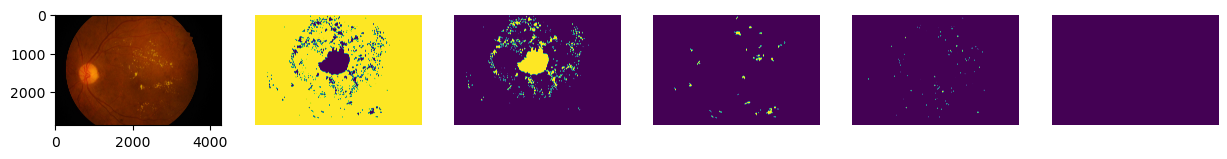

In [11]:
#plot image and each slide of the mask side-by-side
fig, ax = plt.subplots(1,6, figsize=(15,15))
ax[0].imshow(x.numpy().transpose(1,2,0).astype(np.uint8))
plt.axis('off')
for i in range(5):
    ax[i+1].imshow(y[i].numpy())
    ax[i+1].axis('off')

Masks for the 4 classes plus 1 for the background.